In [1]:
import os
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import TypedDict, Literal, Annotated
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage, BaseMessage
from pydantic import BaseModel, Field
import operator

# Load environment variables from .env file
load_dotenv()

# Step1 : Declare Model
model_openapi= ChatOpenAI(model = "gpt-4o-mini",temperature=0, api_key=os.getenv("OPEN_API_KEY") )

# Step :
class ChatState(TypedDict):
    chat_messages: Annotated[list[BaseMessage],add_messages]

# Step : chat_node function
def chat_node(state: ChatState):
    chat_message = state['chat_messages']
    response =model_openapi.invoke(chat_message)
    return ({'response': [response]})

# Step : State
graph = StateGraph(ChatState)

# Step Add Node
graph.add_node('chat_node', chat_node)


# step add Edge
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node',END)


chat_workflow = graph.compile()

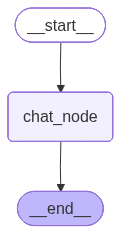

In [3]:
from IPython.display import Image
Image(chat_workflow.get_graph().draw_mermaid_png())

In [21]:
initial_data = {
    "runs": 150,
    "balls": 120, 
    "fours": 15,
    "sixes": 5,
    "strike_rate": 0.0,
    "boundary_percentage": 0.0,
    "balls_per_boundary": 0.0,
    "summary": ""
}  

In [22]:
cricket_result = workflow.invoke(initial_data)

InvalidUpdateError: At key 'runs': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_CONCURRENT_GRAPH_UPDATE